# Environment Setup
## Import the libraries

In [1]:
import os
import tensorflow as tf

#data visualization packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

dimension = 28

## Load dataset

In [2]:
imgs_path = "Dataset/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(os.path.abspath(img_path + "/" + img))
        im = im.resize((dimension,dimension))
        im = im.convert('L')
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


# Data Preprocessing

## Data preparation

### Test-train split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training shape: ",x_train.shape, y_train.shape)
print("Testing shape: ",x_test.shape, y_test.shape)

Training shape:  (31367, 28, 28) (31367,)
Testing shape:  (7842, 28, 28) (7842,)


### Reshaping data

In [4]:
x_train = x_train.reshape(31367, dimension*dimension)
x_test = x_test.reshape(7842, dimension*dimension)
print("Training shape: ",x_train.shape, y_train.shape)
print("Testing shape: ",x_test.shape, y_test.shape)

Training shape:  (31367, 784) (31367,)
Testing shape:  (7842, 784) (7842,)


### Feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
x_train = minmax.fit_transform(x_train)
#transform testing dataset
x_test = minmax.transform(x_test)

## Data Visualisation

In [6]:
from random import randint
index = randint(0, len(x_train) - 1) # pick a random element from the train set
print(f"Pixel values range from {x_train[index].min()} to {x_train[index].max()}")
print(f"Shape of the image: {x_train[index].shape}")

Pixel values range from 0.228 to 1.0
Shape of the image: (784,)


In [7]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  43
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


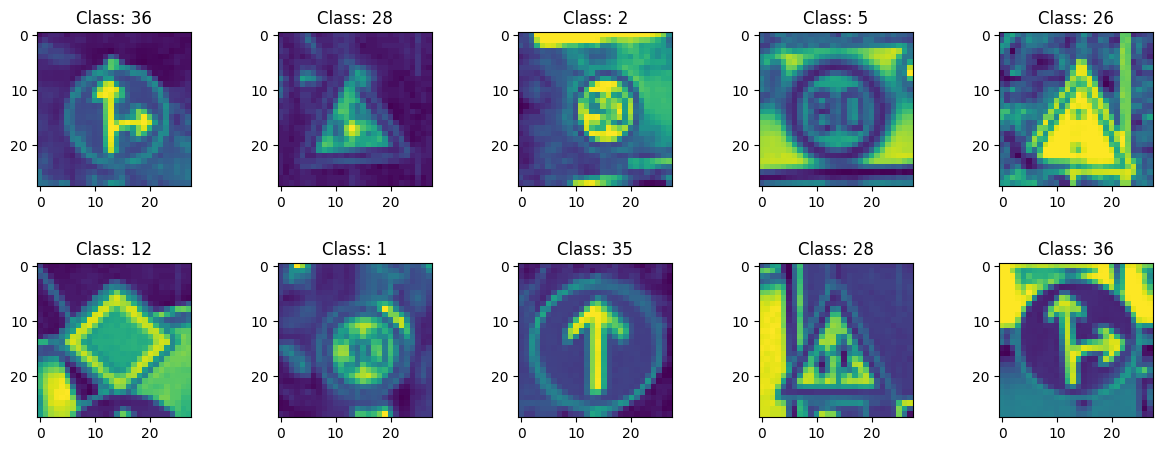

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15, 5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(dimension,dimension))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

# Building Model, Validation and Testing

## Initialise Model

In [9]:
#initializing model
model = Sequential()
#add 1st hidden layer
model.add(Dense(input_dim = x_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
model.add(Dense(units = len(np.unique(y_train)), kernel_initializer='uniform', activation='sigmoid'))
#compile the neural network
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 43)                11051     
                                                                 
Total params: 212,011
Trainable params: 212,011
Non-trainable params: 0
_________________________________________________________________


## Train and validate

In [10]:
history = model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
981/981 [==============================] - 2s 2ms/step - loss: 3.4534 - accuracy: 0.1142 - val_loss: 3.3025 - val_accuracy: 0.1489
Epoch 2/25
981/981 [==============================] - 1s 1ms/step - loss: 3.1505 - accuracy: 0.2543 - val_loss: 2.9426 - val_accuracy: 0.3443
Epoch 3/25
981/981 [==============================] - 1s 1ms/step - loss: 2.7663 - accuracy: 0.3627 - val_loss: 2.5652 - val_accuracy: 0.3967
Epoch 4/25
981/981 [==============================] - 1s 1ms/step - loss: 2.4251 - accuracy: 0.4200 - val_loss: 2.2731 - val_accuracy: 0.4288
Epoch 5/25
981/981 [==============================] - 1s 1ms/step - loss: 2.1527 - accuracy: 0.4703 - val_loss: 2.0293 - val_accuracy: 0.4981
Epoch 6/25
981/981 [==============================] - 1s 1ms/step - loss: 1.9275 - accuracy: 0.5204 - val_loss: 1.8345 - val_accuracy: 0.5324
Epoch 7/25
981/981 [==============================] - 2s 2ms/step - loss: 1.7383 - accuracy: 0.5667 - val_loss: 1.6646 - val_accuracy: 0.5961
Epoch 

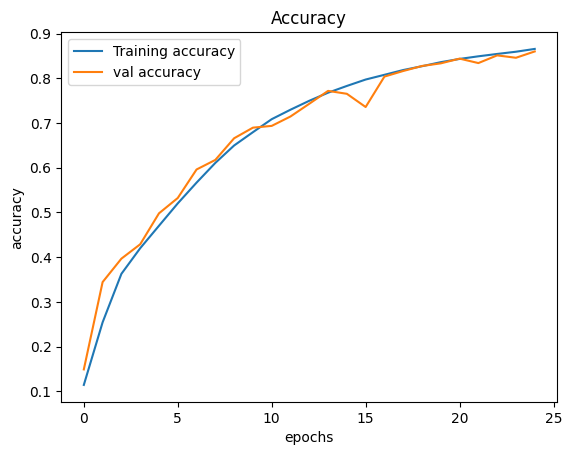

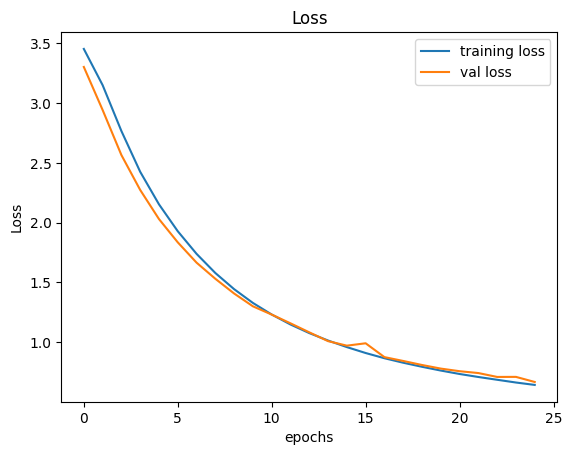

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing

In [12]:
from sklearn.metrics import accuracy_score

# Import images and labels from the test set
test = pd.read_csv("./Dataset/Test.csv")
test_labels = test['ClassId'].values
test_imgs = test['Path'].values
test_img_path = "./Dataset"
test_data = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((dimension,dimension))
    im = im.convert('L')
    im = np.array(im)
    test_data.append(im)

# convert to numpy array
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# reshape the data
print("Testing shape: ",test_data.shape, test_labels.shape)
test_data = test_data.reshape(12630, dimension*dimension)
print("Testing shape: ",test_data.shape, test_labels.shape)

# normalize the data
test_data = minmax.transform(test_data)

# predict the results
predict_x=model.predict(test_data)

# select the index with the maximum probability
classes_x=np.argmax(predict_x,axis=1)

# print the accuracy
print("accuracy: ", accuracy_score(test_labels, classes_x))

Testing shape:  (12630, 28, 28) (12630,)
Testing shape:  (12630, 784) (12630,)
395/395 [==============================] - 0s 1ms/step
accuracy:  0.7299287410926366


# Extract Model weights

In [13]:
np.savetxt('w1.txt', model.get_weights()[0] ,fmt='%1.4e', delimiter=',')

total = ""
with open("w1.txt", "r") as f:
    texts = f.readlines()
    for text in texts:
        total += str(text.split(",")).replace("[", "{").replace("]", "}")
        total += ", "
with open("w1-proc.txt", "w") as f:
    f.write(total)

model.get_weights()[2].shape

np.savetxt('w2.txt', model.get_weights()[2] ,fmt='%1.4e', delimiter=',')

total = ""
with open("w2.txt", "r") as f:
    texts = f.readlines()
    for text in texts:
        total += str(text.split(",")).replace("[", "{").replace("]", "}")
        total += ", "
with open("w2-proc.txt", "w") as f:
    f.write(total)
